# Reinforcement Learning Final Project 

Welcome to your Reinforcement Learning project focused on developing an RL agent capable of playing chess at a strategic level. Chess has long been considered a benchmark for measuring AI capabilities, and this project aims to leverage the power of RL to create an intelligent agent that can make optimal decisions in complex chess positions. By combining the principles of reinforcement learning with the rich strategic domain of chess, you will explore new approaches to create the most effective chess player.

## Project Objectives:

* Train an RL agent to play chess: The primary objective of this project is to develop an RL agent that can play chess at a high level of proficiency. The agent should be capable of evaluating chess positions and making strategic decisions.

* Optimize decision-making using RL algorithms: Explore different RL algorithms, as seen in class, to train the agent. Compare and analise their effectiveness in learning and decision-making capabilities in the context of chess.

* Use a challenging chess environment: Use a comprehensive environment for the agent to interact with, representing the rules and dynamics of chess. This environment will provide a realistic and challenging setting for the agent's training and evaluation.

* Evaluate and benchmark performance: Assess the performance of the RL agent against different benchmarks from existing chess engines. You will compare your agent's performance to established chess engines to measure progress and identify areas for improvement.


### Extra Objectives:

* Investigate transfer learning and generalization: Explore techniques for transfer learning to leverage knowledge acquired in related domains or from pre-training on large chess datasets. Investigate the agent's ability to generalize its knowledge.

* Enhance interpretability and analysis: Develop methods to analise the agent's decision-making process and provide insights into its strategic thinking. Investigate techniques to visualize the agent's evaluation of chess positions and understand its reasoning behind specific moves.

## Let's Play Chess! 

As you know [Chess](https://en.wikipedia.org/wiki/Chess) is a board game for two players, called White and Black, each controlling an army of chess pieces in their color, with the objective to checkmate the opponent's king.

Chess is an abstract strategy game that involves no hidden information and no use of dice or cards. It is played on a chessboard with 64 squares arranged in an eight-by-eight grid. At the start, each player controls sixteen pieces: one king, one queen, two rooks, two bishops, two knights, and eight pawns. White moves first, followed by Black. Checkmating the opponent's king involves putting the king under immediate attack (in "check") whereby there is no way for it to escape.


![](Images/CHESS_MOVES.PNG)

* The king moves one square in any direction. There is also a special move called castling that involves moving the king and a rook. The king is the most valuable piece — attacks on the king must be immediately countered, and if this is impossible, the game is immediately lost.
* A rook can move any number of squares along a rank or file, but cannot leap over other pieces. Along with the king, a rook is involved during the king's castling move.
* A bishop can move any number of squares diagonally, but cannot leap over other pieces.
* A queen combines the power of a rook and bishop and can move any number of squares along a rank, file, or diagonal, but cannot leap over other pieces.
* A knight moves to any of the closest squares that are not on the same rank, file, or diagonal. (Thus the move forms an "L"-shape: two squares vertically and one square horizontally, or two squares horizontally and one square vertically.) The knight is the only piece that can leap over other pieces.
* A pawn can move forward to the unoccupied square immediately in front of it on the same file, or on its first move it can advance two squares along the same file, provided both squares are unoccupied (black dots in the diagram). A pawn can capture an opponent's piece on a square diagonally in front of it by moving to that square (black crosses). It cannot capture a piece while advancing along the same file. A pawn has two special moves: the en passant capture and promotion.

## The [Environment](https://github.com/iamlucaswolf/gym-chess)

The environment gym-chess provides OpenAI Gym environments for the game of Chess. It comes with an implementation of the board and move encoding used in AlphaZero. 

Please install it using the command: 

`pip install gym-chess`

In [1]:
import chess
import gym
import gym_chess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

### A Two player's game

As you know chess is played by two players, as such the gym-chess environment gives you access to both players actions in a sequential matter.

In [2]:
def WHITE_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action


def BLACK_PLAYER_POLICY(env, state):
    legal_actions = env.legal_actions
    action = np.random.choice(legal_actions)

    return action

In [2]:
env = gym.make(
    "ChessAlphaZero-v0"
)  # We will use Alpha Zero's numenclature for the actions encodings

state = env.reset()
done = False
counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

while not done:
    if (
        counter % 2 == 0
    ):  # If the step number is pair, this means that it is the WHITE player's turn
        action = WHITE_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
        action = BLACK_PLAYER_POLICY(env, state)
        next_state, reward, done, info = env.step(action)

    counter += 1

print(reward)

env.close()

NameError: name 'WHITE_PLAYER_POLICY' is not defined

#### The agent receives a reward of +1 when the white player makes a winning move, and a reward of -1 when the black player makes a winning move. 

All other rewards are zero.

### Evaluationg your agent with [Stockfish](https://github.com/zhelyabuzhsky/stockfish)

In order to have a good enough idea that our agent is actually playing well we need a benchmarkable opponent.

As such we need to install stockfish a free and open-source chess engine. Stockfish has consistently ranked first or near the top of most chess-engine rating lists and, as of April 2023, is the strongest CPU chess engine in the world.

`pip install stockfish`


In [2]:
from stockfish import Stockfish

StockFish has a python api as seen above, nevertheless the engine still needs to be downloaded [here](https://stockfishchess.org/download/) and used in the path.

NOTE: You were given an engine already in moodle, nevertheless different computer systems (Windows, Mac, Ubuntu) might require other Stockfish engines.

In [7]:
Stockfish_path = "c:/Users/AnaMi/OneDrive - NOVAIMS/Master_Nova_IMS/2nd semester/ReinforcementLearning/Project/Reinforcement-Learning-Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"
#Stockfish_path = "C:/Users/sofia/NOVA IMS/1st year/Semester 2/Reinforcement Learning/stockfish_15.1_win_x64_avx2/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"


The functions bellow generate episodes/games for a WHITE or BLACK Pieces Scenario respectively. We store the outcome of the episode (win/draw/loss) and the number of steps taken.

#### Notice how the AGENT_POLICY function is used it recieves as inputs the env and the current state.
`action = AGENT_POLICY(env, state)`

In [6]:
def generate_WHITE_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 0
        ):  # If the step number is pair, this means that it is the WHITE player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1
        state = next_state
    env.close()

    return reward, np.ceil(counter / 2)


def generate_BLACK_scenario(Stockfish_path, AGENT_POLICY):
    env = gym.make(
        "ChessAlphaZero-v0"
    )  # We will use Alpha Zero's numenclature for the actions encodings
    stockfish = Stockfish(Stockfish_path)
    stockfish.set_elo_rating(
        100
    )  # Default "skill" level is 1350, higher will increase the skill of stockfish "player". See more at https://en.wikipedia.org/wiki/Elo_rating_system

    state = env.reset()
    done = False
    counter = 0  # Since each step represents a play in a chess game we are going to store the number of steps associated to the episode/game

    while not done:
        if (
            counter % 2 == 1
        ):  # If the step number is not pair, aka odd, this means that it is the BLACK player's turn
            action = AGENT_POLICY(env, state)
            decoded_action = str(env.decode(action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        else:  # If the step number is pair, this means that it is the WHITE player's turn
            decoded_action = stockfish.get_best_move()
            action = env.encode(chess.Move.from_uci(decoded_action))
            stockfish.make_moves_from_current_position([decoded_action])
            next_state, reward, done, info = env.step(action)

        counter += 1
        state = next_state
    env.close()

    return reward, np.ceil(counter / 2)

In the function bellow a visualization is produced from the bechmarks made.

In [7]:
def AGENT_EVALUATION(Stockfish_path, AGENT_POLICY, n_evaluations=100):
    results_list = []

    for evaluation_number in tqdm(range(n_evaluations)):
        generate_episode = generate_WHITE_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == 1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["WHITE", result, n_steps])

        generate_episode = generate_BLACK_scenario

        reward, n_steps = generate_episode(Stockfish_path, AGENT_POLICY)

        if reward == -1:
            result = "VICTORY"
        elif reward == 0:
            result = "DRAW"
        else:
            result = "LOSS"

        results_list.append(["BLACK", result, n_steps])

    df = pd.DataFrame(
        results_list, columns=["AGENT COLOR", "OUTCOME", "N STEPS"]
    ).astype("int", errors="ignore")

    plt.style.use("fivethirtyeight")

    results_group = (
        df.groupby(["AGENT COLOR", "OUTCOME"])
        .count()
        .rename(columns={"N STEPS": "GAMES"})
    )

    n_games = results_group.sum()[0]

    results_group = (2 * 100 * results_group / (n_games)).astype("int")

    viz_df = (
        results_group.reset_index()
        .pivot_table(index="AGENT COLOR", columns="OUTCOME", values="GAMES")
        .fillna(0)
    )

    viz_df.plot(kind="barh", stacked=True)

    plt.xlabel("Percentage")
    plt.title(f"EVALUATION RESULTS FOR {n_games} GAMES")

    plt.show()

    return df

  0%|          | 0/5 [00:00<?, ?it/s]

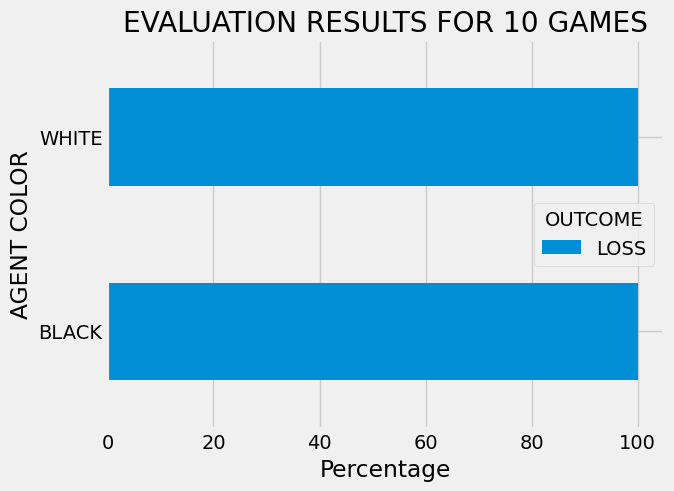

In [8]:
df = AGENT_EVALUATION(Stockfish_path, WHITE_PLAYER_POLICY, n_evaluations=5)

In [9]:
df.head(5)

,AGENT COLOR,OUTCOME,N STEPS
0,WHITE,LOSS,23
1,BLACK,LOSS,19
2,WHITE,LOSS,16
3,BLACK,LOSS,13
4,WHITE,LOSS,9


# Ready to Play Chess?

### Imports

In [15]:
import chess
import chess.engine
import math
import random
import numpy as np
import h5py
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import os

### Environment

In [28]:
board = chess.Board()
engine = chess.engine.SimpleEngine.popen_uci(Stockfish_path)

# Set the initial state
state = chess.Board()

In [25]:
Stockfish_path = "c:/Users/AnaMi/OneDrive - NOVAIMS/Master_Nova_IMS/2nd semester/ReinforcementLearning/Project/Reinforcement-Learning-Project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"
#Stockfish_path = "C:/Users/sofia/NOVA IMS/1st year/Semester 2/Reinforcement Learning/stockfish_15.1_win_x64_avx2/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"
#Stockfish_path = "C:/Users/David/Desktop/Nova IMS/2º semestre/Reinforcement Learning/project/stockfish_15.1_win_x64_avx2/stockfish-windows-2022-x86-64-avx2"

### Neural Network

In [29]:
# Set the counter for the number of steps
counter = 0

# Define the Neural Network Model
input_shape = (64,)
action_space_size = 4096

model = keras.Sequential()
model.add(keras.layers.Dense(4096, activation='relu', input_shape=input_shape))
model.add(keras.layers.Dense(2048, activation='relu'))
model.add(keras.layers.Dense(1024, activation='relu'))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(action_space_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy')

# Define the function to preprocess the state
def preprocess_state(state):
    # Convert the chess board state to a binary representation
    binary_state = np.zeros(64, dtype=np.float32)

    for i in range(64):
        piece = state.piece_at(i)
        if piece is not None:
            piece_value = {'P': 1, 'N': 2, 'B': 3, 'R': 4, 'Q': 5, 'K': 6,
                           'p': -1, 'n': -2, 'b': -3, 'r': -4, 'q': -5, 'k': -6}
            binary_state[i] = piece_value[piece.symbol()]

    return binary_state

# Define the function to select an action
def select_action(state):
    while True:
        state_input = np.array([preprocess_state(state)])
        action_probabilities = model.predict(state_input)[0]
        action = np.random.choice(action_space_size, p=action_probabilities)
        moves = list(state.legal_moves)
        if action < len(moves):
            return action

# Define the training loop
def train_agent(model, num_episodes):
    for episode in range(num_episodes):
        state = chess.Board()  # Reset the state at the beginning of each episode
        done = False
        counter = 0
        while not done:
            action = select_action(state)
            moves = list(state.legal_moves)
            move = moves[action]
            state.push(move)
            counter += 1

            state_input = np.array([preprocess_state(state)])
            next_state_input = state_input  # In chess, the next state is the same as the current state after making a move
            if action < action_space_size:
                target = model.predict(state_input)
                target[0][action] = 1.0  # The target for the selected action is 1.0 (assuming a perfect policy)
                model.fit(state_input, target, epochs=1, verbose=0)

            done = state.is_game_over()

        print("Episode:", episode+1, "Steps:", counter)
        
        # Save the model after each episode
        model.save('chess_agent_nn.h5')

# Train the modified model
train_agent(model, num_episodes=1)

1/1 [==============================] - 0s 68ms/step
Episode: 1 Steps: 31


In [34]:
def preprocess_state(board):
    """
    Preprocess the chess board state.

    Args:
        board (chess.Board): The chess board.

    Returns:
        np.array: The preprocessed state array.
    """
    state_array = np.zeros(64)
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            state_array[i] = piece.piece_type
    return state_array

def select_action(board, policy):
    """
    Select an action using the policy network.

    Args:
        board (chess.Board): The chess board.
        policy (tf.keras.Model): The policy network model.

    Returns:
        int: The index of the selected action.
    """
    state_array = preprocess_state(board)
    state_input = np.array([state_array])
    action_probabilities = policy.predict(state_input)[0]
    valid_moves = list(board.legal_moves)
    valid_move_indices = [move_to_index(move) for move in valid_moves]

    valid_action_probabilities = []
    for i in valid_move_indices:
        if i < len(action_probabilities):
            valid_action_probabilities.append(action_probabilities[i])
        else:
            valid_action_probabilities.append(0.0)

    total_prob = sum(valid_action_probabilities)

    if total_prob == 0.0:
        action = np.random.choice(len(valid_moves))
    else:
        valid_action_probabilities = [prob / total_prob for prob in valid_action_probabilities]
        action = np.random.choice(len(valid_moves), p=valid_action_probabilities)

    return valid_moves[action]

def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square

def generate_episode(stockfish_path, agent_policy):
    """
    Generate a single episode of the game.

    Args:
        stockfish_path (str): The file path to the Stockfish engine.
        agent_policy (tf.keras.Model): The policy network model.

    Returns:
        int: The reward for the episode (1 for victory, -1 for defeat, 0 for draw).
        int: The number of steps taken in the episode.
    """
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0

    while not board.is_game_over():
        if board.turn == chess.WHITE:
            # Agent's turn
            action = select_action(board, agent_policy)
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0))
            action = result.move

        board.push(action)
        counter += 1

    result = None
    if board.is_checkmate():
        result = 1 if board.turn == chess.BLACK else -1
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        result = 0

    engine.quit()
    return result, counter


In [66]:
def evaluate_agent(stockfish_path, agent_policy, num_games):
    game_results = []
    step_counts = []
    
    for game in range(num_games):
        result, steps = generate_episode(stockfish_path, agent_policy)
        game_results.append(result)
        step_counts.append(steps)
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

1/1 [==============================] - 0s 27ms/step


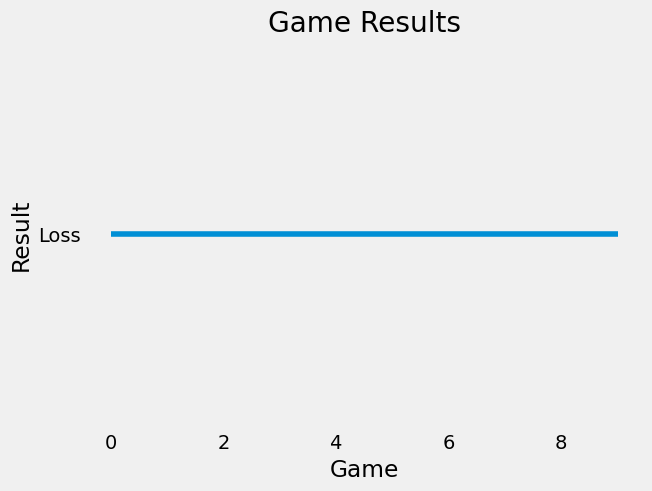

,Steps,Result
0,12,Loss
1,24,Loss
2,42,Loss
3,26,Loss
4,42,Loss
5,44,Loss
6,28,Loss
7,28,Loss
8,24,Loss
9,18,Loss


In [67]:
evaluate_agent(stockfish_path, model, 10)

### Deep Q-Learining - DQL

In [20]:
# Set the initial state
state = chess.Board()

# Set the counter for the number of steps
counter = 0

# Define the Deep Q-Network (DQN) Model
input_shape = (8, 8, 12)  # Assuming a chess board representation with channels for each piece type
action_space_size = 4096

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(action_space_size, activation='linear'))

model.compile(optimizer='adam', loss='mse')

class ReplayBuffer:
    def __init__(self, max_size):
        self.max_size = max_size
        self.buffer = []
        self.agent_plays = []
    
    def add(self, state, action, reward, next_state):
        experience = (state, action, reward, next_state)
        self.buffer.append(experience)
        
        if len(self.buffer) > self.max_size:
            self.buffer.pop(0)
    
    def sample(self, batch_size):
        batch = np.random.choice(len(self.buffer), size=batch_size, replace=False)
        states, actions, rewards, next_states = zip(*[self.buffer[i] for i in batch])
        return np.array(states), np.array(actions), np.array(rewards), np.array(next_states)

replay_buffer = ReplayBuffer(max_size=100000)

def preprocess_state(board):
    """
    Preprocess the chess board state.

    Args:
        board (chess.Board): The chess board.

    Returns:
        np.array: The preprocessed state array.
    """
    state_array = np.zeros((8, 8, 12))  # Reshape to match expected input shape
    for i in range(64):
        piece = board.piece_at(i)
        if piece is not None:
            piece_type = piece.piece_type
            color = int(piece.color)
            channel = piece_type - 1 + color * 6
            row = i // 8
            col = i % 8
            state_array[row, col, channel] = 1
    return state_array


def select_action(board, dqn_model, current_step, total_steps, agent_plays):
    epsilon = max(0.1, 1.0 - current_step / total_steps)

    if np.random.rand() < epsilon:
        return np.random.choice(list(board.legal_moves))
    else:
        state_array = preprocess_state(board)
        state_input = np.array([state_array])
        q_values = dqn_model.predict(state_input)[0]
        valid_moves = list(board.legal_moves)
        valid_move_indices = [move_to_index(move) for move in valid_moves]
        valid_q_values = [q_values[i] for i in valid_move_indices]
        best_move = valid_moves[np.argmax(valid_q_values)]
        
        if agent_plays:
            historical_q_values = [q_values[move_to_index(move)] for move in agent_plays]
            best_historical_move = agent_plays[np.argmax(historical_q_values)]
            if q_values[move_to_index(best_historical_move)] > valid_q_values[np.argmax(valid_q_values)]:
                return best_historical_move
        
        return best_move



def move_to_index(move):
    """
    Convert a chess move to an index.

    Args:
        move (chess.Move): A chess move.

    Returns:
        int: The index corresponding to the move.
    """
    return move.from_square * 64 + move.to_square



def generate_episode(stockfish_path, dqn_model, replay_buffer, epsilon):
    engine = chess.engine.SimpleEngine.popen_uci(stockfish_path)
    board = chess.Board()
    counter = 0

    while not board.is_game_over():
        state_array = preprocess_state(board)
        state_input = np.array([state_array])

        if board.turn == chess.WHITE:
            # Agent's turn
            if np.random.random() < epsilon:
                # Explore: select a random legal move
                action = np.random.choice(list(board.legal_moves))
            else:
                # Exploit: select action with highest Q-value from DQN
                q_values = dqn_model.predict(state_input)[0]
                valid_moves = list(board.legal_moves)
                valid_move_indices = [move_to_index(move) for move in valid_moves]
                valid_q_values = [q_values[i] for i in valid_move_indices]
                action = valid_moves[np.argmax(valid_q_values)]
            
            # Save agent's play to replay buffer
            replay_buffer.agent_plays.append(action)

            # Execute action and observe next state and reward
            next_state = board.copy()
            next_state.push(action)
            reward = 0  # Set the reward based on the game outcome later

            # Add experience to replay buffer
            replay_buffer.add(state_array, move_to_index(action), reward, preprocess_state(next_state))
        else:
            # Stockfish's turn
            result = engine.play(board, chess.engine.Limit(time=2.0))
            action = result.move
            next_state = board.copy()
            next_state.push(action)
            reward = 0  # Set the reward based on the game outcome later

            # Add experience to replay buffer
            replay_buffer.add(state_array, move_to_index(action), reward, preprocess_state(next_state))

        board.push(action)
        counter += 1

    # Set the reward based on the game outcome
    result = None
    if board.is_checkmate():
        result = 1 if board.turn == chess.BLACK else -1
    elif board.is_stalemate() or board.is_insufficient_material() or board.is_seventyfive_moves():
        result = 0

    engine.quit()
    return result, counter


#### DQL Evaluation against Stockfish

In [62]:
def evaluate_dql(stockfish_path, dqn_model, num_games=10):
    game_results = []
    step_counts = []
    
    for game in range(num_games):
        result, steps = generate_episode(stockfish_path, dqn_model)
        game_results.append(result)
        step_counts.append(steps)
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

1/1 [==============================] - 0s 24ms/step


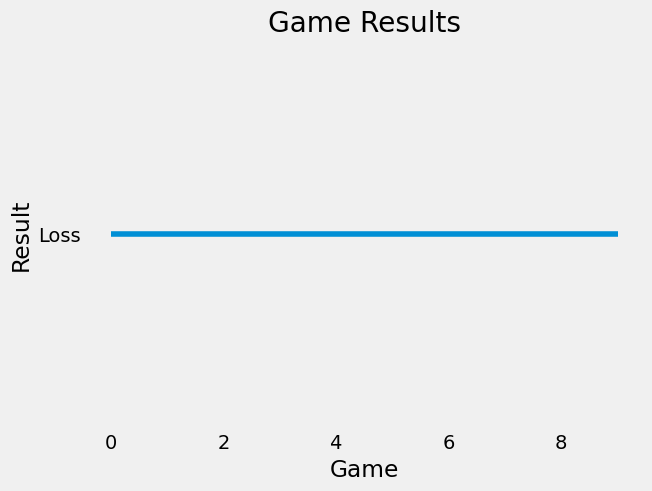

,Steps,Result
0,22,Loss
1,32,Loss
2,16,Loss
3,26,Loss
4,26,Loss
5,36,Loss
6,8,Loss
7,32,Loss
8,22,Loss
9,22,Loss


In [63]:
evaluate_dql(stockfish_path, model, 10)

### MCTS

In [9]:
class Node:
    def __init__(self, move=None, parent=None):
        self.move = move
        self.parent = parent 
        self.children = []
        self.wins = 0
        self.visits = 0
        self.untried_moves = []

    def select_child(self):
        # Use the UCB1 formula to select the child with the highest UCB value
        exploration_constant = 1.4
        best_child = max(self.children, key=lambda c: c.wins / c.visits + exploration_constant * math.sqrt(math.log(self.visits) / c.visits))
        return best_child

    def expand(self, state):
        # Take an untried move, create a new state, and add a child node
        move = self.untried_moves.pop()
        new_state = state.copy()
        new_state.push(move)
        child_node = Node(move=move, parent=self)
        self.children.append(child_node)
        return child_node

    def update(self, result):
        # Update the node's wins and visits count based on the result of the simulation
        self.visits += 1
        self.wins += result

def simulate(state):
    # Simulate a game from the current state until the end and return the result (1 for a win, -1 for a loss, 0 for a draw)
    while not state.is_game_over():
        move = random.choice(list(state.legal_moves))
        state.push(move)
    result = get_result(state)
    return result

def get_result(state):
    # Calculate the result of the game (1 for a win, -1 for a loss, 0 for a draw)
    if state.is_checkmate():
        if state.turn:
            return -1
        else:
            return 1
    return 0

def monte_carlo_tree_search(state, simulations):
    root = Node()  # Create the root node
    root.untried_moves = list(state.legal_moves)

    for _ in range(simulations):
        node = root
        temp_state = state.copy()

        # Selection: Traverse the tree until an unexplored node is found or reach a leaf node
        while node.untried_moves == [] and node.children != []:
            node = node.select_child()
            temp_state.push(node.move)

        # Expansion: Expand the tree by creating a new child node
        if node.untried_moves:
            node = node.expand(temp_state)

        # Simulation: Simulate a game from the current state
        result = simulate(temp_state)

        # Backpropagation: Update the nodes' statistics from the current node to the root
        while node is not None:
            node.update(result)
            node = node.parent

    # Select the move with the highest visit count
    best_move = max(root.children, key=lambda c: c.visits).move
    return best_move

# Main code
#board = chess.Board()
#engine = chess.engine.SimpleEngine.popen_uci(Stockfish_path)
simulations = 5  # Adjust the number of simulations as desired

existing_data_loaded = False
if os.path.exists("chess_agent_mcts.h5"):
    # Load the existing model and training data
    model = tf.keras.models.load_model("chess_agent_mcts.h5")
    with h5py.File("chess_agent_mcts.h5", "r") as f:
        if "X_train" in f and "y_train" in f:
            X_existing = f["X_train"][:]
            y_existing = f["y_train"][:]
            existing_data_loaded = True

# Initialize training data and labels
X_train = []
y_train = []

# Append the existing training data to X_train and y_train
if existing_data_loaded:
    X_train.extend(X_existing)
    y_train.extend(y_existing)

# Perform MCTS simulations to collect training data
for i in range(simulations):
    state = board.copy()  # Get a copy of the initial board state
    moves = []  # Store the moves made during the simulation
    result = None  # Store the result of the simulation

    # Play out the simulation until the end
    while not state.is_game_over():
        if state.turn:
            move = monte_carlo_tree_search(state, simulations=5)
        else:
            move = engine.play(state, chess.engine.Limit(time=.000001)).move

        moves.append(move)
        state.push(move)

    # Determine the result of the simulation
    result = get_result(state)

    # Convert moves to a one-hot encoded representation
    encoded_moves = []
    for move in moves:
        encoded_move = np.zeros(64*64)  # One-hot encoding with 64*64 binary vector
        start_square = move.from_square
        end_square = move.to_square
        encoded_move[start_square*64 + end_square] = 1
        encoded_moves.append(encoded_move)

    # Add each move separately to the training data and labels
    X_train.extend(encoded_moves)
    y_train.extend([result] * len(encoded_moves))

    # Save the moves and training data at the specified interval
    save_interval = 2
    if (i + 1) % save_interval == 0:
        # Convert the training data and labels to regular NumPy arrays with a fixed shape
        X_train_np = np.array(X_train, dtype=np.float64)
        y_train_np = np.array(y_train, dtype=np.float64)

        # Define the model
        model_mcts = Sequential()
        model_mcts.add(Dense(64, activation='relu', input_shape=(64*64,), dtype='float64'))
        model_mcts.add(Dense(64, activation='relu'))
        model_mcts.add(Dense(1))

        # Compile the model
        model_mcts.compile(optimizer='adam', loss='mse')

        # Train the model
        model_mcts.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=1)

        # Save the trained model to a .h5 file
        model_mcts.save('chess_agent_mcts.h5')

# Convert the training data and labels to regular NumPy arrays with a fixed shape
X_train_np = np.array(X_train, dtype=np.float64)
y_train_np = np.array(y_train, dtype=np.float64)

# Define the model
model_mcts = Sequential()
model_mcts.add(Dense(64, activation='relu', input_shape=(64*64,), dtype='float64'))
model_mcts.add(Dense(64, activation='relu'))
model_mcts.add(Dense(1))

# Compile the model
model_mcts.compile(optimizer='adam', loss='mse')

# Train the model
model_mcts.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=1)

# Save the trained model to a .h5 file
model_mcts.save('chess_agent_mcts.h5')

Epoch 1/10
2/2 [==============================] - 1s 24ms/step - loss: 0.9858
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 0.9432
Epoch 3/10
2/2 [==============================] - 0s 22ms/step - loss: 0.9007
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 0.8558
Epoch 5/10
2/2 [==============================] - 0s 22ms/step - loss: 0.8076
Epoch 6/10
2/2 [==============================] - 0s 19ms/step - loss: 0.7558
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 0.7008
Epoch 8/10
2/2 [==============================] - 0s 26ms/step - loss: 0.6430
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 0.5816
Epoch 10/10
2/2 [==============================] - 0s 17ms/step - loss: 0.5175
Epoch 1/10
3/3 [==============================] - 1s 19ms/step - loss: 1.0122
Epoch 2/10
3/3 [==============================] - 0s 19ms/step - loss: 0.9476
Epoch 3/10
3/3 [==============================] - 0s 18ms/step 

#### MCTS Evaluation against Stockfish

In [ ]:
# alternativa 1

In [64]:
def evaluate_mcts_agent(board, engine, simulations, num_games):
    game_results = []
    step_counts = []
    
    for _ in range(num_games):
        state = board.copy()
        moves = []
        result = None
        
        while not state.is_game_over():
            if state.turn:
                move = monte_carlo_tree_search(state, simulations)
            else:
                move = engine.play(state, chess.engine.Limit(time=.000001)).move

            moves.append(move)
            state.push(move)
            
        result = get_result(state)
        game_results.append(result)
        step_counts.append(len(moves))
        
    # Create a DataFrame to store the results
    results_df = pd.DataFrame({'Steps': step_counts, 'Result': game_results})
    
    # Replace result values with "Loss", "Win", or "Draw"
    results_df['Result'] = results_df['Result'].map({-1: 'Loss', 1: 'Win'})
    results_df['Result'] = results_df['Result'].fillna('Draw')
    
    # Plot the game results
    result_labels = results_df['Result'].tolist()
    plt.plot(result_labels)
    plt.xlabel('Game')
    plt.ylabel('Result')
    plt.title('Game Results')
    plt.grid(False)  # Remove the grid
    plt.show()
    
    return results_df

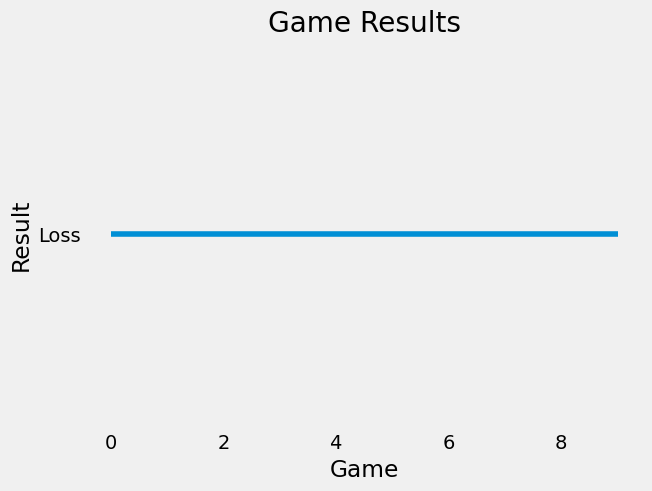

,Steps,Result
0,22,Loss
1,24,Loss
2,20,Loss
3,20,Loss
4,28,Loss
5,26,Loss
6,30,Loss
7,30,Loss
8,34,Loss
9,24,Loss


In [65]:
evaluate_mcts_agent(board, engine, 10, 10)

### Measures

In [ ]:
# tirar a mudança de white e black para só uma, porque somos sempre o branco

In [13]:
def count_results(stockfish_path, agent_policy, n_evaluations=10):
    wins = 0
    losses = 0
    draws = 0

    for evaluation_number in tqdm(range(n_evaluations)):
        # White plays as agent
        generate_episode_white = generate_episode(Stockfish_path, agent_policy)
        reward_white, _ = generate_episode_white
        if reward_white == 1:
            wins += 1
        elif reward_white == 0:
            draws += 1
        else:
            losses += 1

        # Black plays as agent
        generate_episode_black = generate_episode(Stockfish_path, agent_policy)
        reward_black, _ = generate_episode_black
        if reward_black == -1:
            wins += 1
        elif reward_black == 0:
            draws += 1
        else:
            losses += 1

    return wins, losses, draws

agent_policy = model_mcts  # Assuming you have already loaded the policy network
n_evaluations = 10

n_wins, n_losses, n_draws = count_results(Stockfish_path, agent_policy, n_evaluations)
print("Wins:", n_wins)
print("Losses:", n_losses)
print("Draws:", n_draws)

import matplotlib.pyplot as plt

def calculate_elo_rating(wins, losses, draws, k_factor=32, initial_rating=1200):
    """
    Calculate the Elo rating based on wins, losses, and draws.

    Args:
        wins (int): Number of wins.
        losses (int): Number of losses.
        draws (int): Number of draws.
        k_factor (int): The K-factor used in Elo rating calculation. Default is 32.
        initial_rating (int): The initial rating. Default is 1200.

    Returns:
        int: The Elo rating.
    """
    expected_score = 1 / (1 + 10 ** ((initial_rating - initial_rating) / 400))
    rating_change = k_factor * ((wins + 0.5 * draws) - (losses + 0.5 * draws))
    new_rating = initial_rating + rating_change
    return new_rating

def plot_training_curves(wins, losses, draws, elo_ratings):
    """
    Plot the training curves with win rate and Elo rating.

    Args:
        wins (list): List of the number of wins at each training iteration.
        losses (list): List of the number of losses at each training iteration.
        draws (list): List of the number of draws at each training iteration.
        elo_ratings (list): List of Elo ratings at each training iteration.
    """
    iterations = range(1, len(wins + 1))
    win_rates = [wins[i] / (wins[i] + losses[i] + draws[i]) for i in range(len(wins))]

    fig, ax1 = plt.subplots()

    # Plot win rate
    color = 'tab:blue'
    ax1.set_xlabel('Training Iterations')
    ax1.set_ylabel('Win Rate', color=color)
    ax1.plot(iterations, win_rates, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot Elo rating
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Elo Rating', color=color)
    ax2.plot(iterations, elo_ratings, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Training Curves')
    plt.show()

elo_ratings = [1200] + [calculate_elo_rating(n_wins, n_losses, n_draws)]

#plot_training_curves(wins, losses, draws, elo_ratings)

print(elo_ratings)

  0%|          | 0/10 [00:00<?, ?it/s]

NameError: name 'generate_episode' is not defined

In [14]:
print(calculate_elo_rating(n_wins, n_losses, n_draws))

1200.0
